# Plotly Express

In [2]:
# Importar plotly
import plotly.express as px

# Importar otros módulos
import pandas as pd
import numpy as np

In [3]:
# Obtener datos
data = px.data.gapminder()

# Crear columna para PIB (GDP)
data['gdp'] = data['pop'] * data['gdpPercap']

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


# Plotly Graph Objects vs. Plotly Express

Todos los gráficos de Plotly tienen la estructura de diccionario. El módulo graph_objects contiene todas los objetos individuales de un gráfico. Pueden acumularse unos sobre otros desde sus partes más pequeñas hasta construir la imagen final, como en la siguiente celda.

In [4]:
import plotly.graph_objects as go

dict_of_fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "Gráfico construido con objetos individuales"}}
})

fig = go.Figure(dict_of_fig)

fig.show()

Por su parte, Plotly Express Express permite crear gráficos rápidamente indicando solo algunos datos y dando valores por defecto al resto de características.

Se recomienda utilizar Plotly Express para generar las imágenes y, después, modificar los objetos individuales que generan el gráfico.

In [5]:
# Crear objeto con Express
fig = px.bar(
    x = [1, 2, 3],
    y =  [1, 3, 2],
    title = "Gráfico construido con Express")

# Cambiar etiqueta del eje Y
fig.update_layout(yaxis_title = 'Cambiando etiqueta del eje Y')

In [6]:
fig['layout']

Layout({
    'barmode': 'relative',
    'legend': {'tracegroupgap': 0},
    'template': '...',
    'title': {'text': 'Gráfico construido con Express'},
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Cambiando etiqueta del eje Y'}}
})

# Tipos de gráfico

### Gráfico de linea

In [7]:
# Gráfico básico
fig = px.line(
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia', # Título del gráfico
    color = 'country'
    )
fig.show()

In [8]:
# Personalizando el gráfico
fig = px.line(
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia', # Título del gráfico

    # Tamaño del gráfico en píxeles
    width = 1000,
    height = 375,

    # Colores
    color = 'country', # Determinar color según país
    # Códigos de color
    # Según orden de aparición
    color_discrete_sequence = ['red', 'green', 'blue'],
    # Indicando explícitamente qué línea usa qué color
    color_discrete_map = {
        'Spain' : 'red', # Texto
        'Portugal' : 'rgba(255, 255, 0, 1)', # Código RGBA
        'France' : '#34cfeb'}, # Código hexadecimal

    # Cambiar etiquetas
    labels = {
        'country' : 'País',
        'pop' : 'Población',
        'year' : 'Año'
    },

    # Marcadores
    markers = True,
    symbol = 'country',

    # Rango del gráfico
    # range_x = [1990, 2000],
    # range_y = [0, 1e8]
    )

# Centrar el título
fig.update_layout(title_x=0.5)

### Gráfico de barras

In [9]:
fig = px.bar(    
    data.query('country in ("Spain", "Portugal", "France")'), 
    x = 'year', y = 'pop',
    title = 'Población de España, Portugal y Francia',
    color = 'country',
    barmode = 'group' # Desapilar las barras de los tres países
    )

# Modificar el número de ticks
fig.update_layout(
    yaxis = {
        'nticks' : 20},
    xaxis = {
        'nticks' : 20})

### Gráfico de área

In [10]:
px.area(
    data,
    x = 'year',
    y = 'gdp',
    line_group = 'country',
    color = 'continent',
    title = 'PIB mundial por año',
)

### Gráficos de caja

In [11]:
px.box(
    data,
    x = 'continent',
    y = 'gdpPercap',
    log_y = True,
    color = 'continent',
    hover_name= 'country'
)

### Gráfico de dispersión (scattermap)

In [12]:
px.scatter(
    data.query('year == 2007'),
    x = "gdpPercap", y="lifeExp", 
    log_x = True, # Poner el eje X en escala logarítmica
    title = 'PIB per cápita frente a esperanza de vida',

    size="pop", # Tamaño de las burbujas según población 
    size_max = 60, # Limitar el tamaño de las burbujas

    color = "continent", # Colorear según continente
    hover_name="country", # Nombre que aparece al poner el cursor encima
    
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'gdpPercap' : 'PIB per cápita',
        'continent' : 'Continente'
    }
)

### Gráfico circular (piechart)

In [13]:
px.pie(
    data.query('country in ("Spain", "Portugal", "United Kingdom", "France", "Germany", "Italy")').query('year == 2007'), 
    values = 'gdp',
    names = 'country',
    title = 'PIB en Europa Occidental en 2007',
    height = 500,
    width = 500
)

### Treemap

In [14]:
px.treemap(
    data.query('year == 2007'), 
    path = ['continent', 'country'],
    values = 'gdp',
    title = 'PIB mundial en 2007'    
)

### Sunburst

In [15]:
px.sunburst(
    data.query('year == 2007'),
    path = ['continent', 'country'], # Categorías que agrupan
    values = 'pop', # Valores finales
    color = 'lifeExp',
    labels = {'lifeExp' : 'Años'},
    hover_name= 'country',

    title = 'Población mundial y esperanza de vida en 2007',
    height = 500,
    width = 500
)

### Animaciones

In [16]:
px.scatter(
    data,
    x = 'pop',
    log_x = True,
    y = 'lifeExp',
    range_y = [30, 85],
    color = 'continent',
    hover_name = 'country',
    facet_col= 'continent',

    # Parámetros para animar
    animation_frame = 'year', # Animar año a año
    animation_group = 'country' # Agrupar por país

    )

In [17]:
px.bar(
    data, 
    x = "continent", 
    y="pop", range_y=[0,4000000000],
    color="continent",

  animation_frame="year", 
  animation_group="country"
  )

# Ejercicios

### 1) Grafica el PIB per cápita de España

In [18]:
fig = px.line(
    data.query('country == "Spain"'),
    x = 'year',
    y = 'gdpPercap',
    labels = {
        'gdpPercap' : 'PIB per cápita',
        'year' : 'Año'
    },
    color_discrete_sequence = ['red'],
    title = 'PIB per cápita en España'
)

fig.update_layout(title_x = 0.5)

In [1]:
import seaborn as sns

In [24]:
data.query('country == "Spain"')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
1416,Spain,Europe,1952,64.940,28549870,3834.034742,ESP,724,1.094612e+11
1417,Spain,Europe,1957,66.660,29841614,4564.802410,ESP,724,1.362211e+11
1418,Spain,Europe,1962,69.690,31158061,5693.843879,ESP,724,1.774091e+11
1419,Spain,Europe,1967,71.440,32850275,7993.512294,ESP,724,2.625891e+11
1420,Spain,Europe,1972,73.060,34513161,10638.751310,ESP,724,3.671769e+11
1421,Spain,Europe,1977,74.390,36439000,13236.921170,ESP,724,4.823402e+11
1422,Spain,Europe,1982,76.300,37983310,13926.169970,ESP,724,5.289620e+11
1423,Spain,Europe,1987,76.900,38880702,15764.983130,ESP,724,6.129536e+11
1424,Spain,Europe,1992,77.570,39549438,18603.064520,ESP,724,7.357407e+11
1425,Spain,Europe,1997,78.770,39855442,20445.298960,ESP,724,8.148564e+11


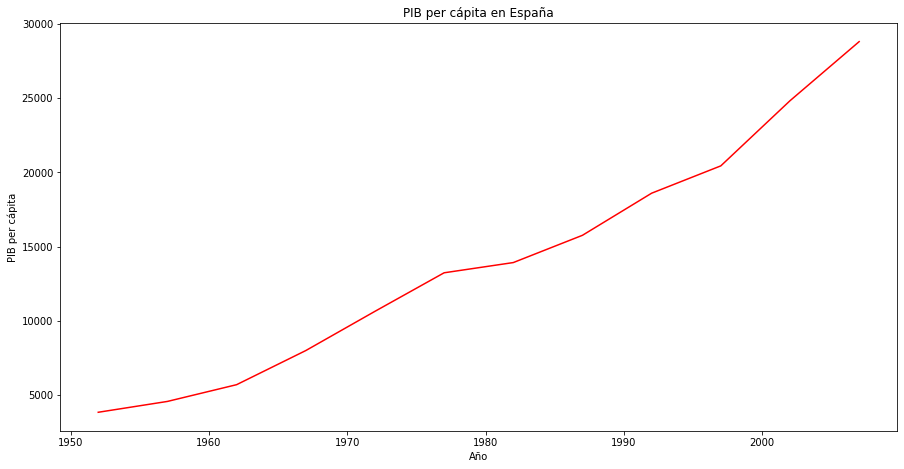

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15, 7.5))

fig = sns.lineplot(
    data = data.query('country == "Spain"'),
    x = 'year',
    y = 'gdpPercap',
    color = 'red',
)

fig.set_title('PIB per cápita en España')
fig.set_xlabel('Año')
fig.set_ylabel('PIB per cápita');

### 2) Añade una animación al siguiente gráfico de cajas para que muestre la evolución con los años

In [115]:
px.box(
    data,
    x = 'continent',
    y = 'gdpPercap',
    log_y = True,
    color = 'continent',
    hover_name= 'country',
    title = 'PIB per cápita por continente y año',
        
    animation_frame= 'year',
    animation_group= 'continent'
)

# Enlaces de interés para Plotly